In [1]:
import random
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader, random_split
from importlib import reload


from models.MLP import *
import utils
from utils import *

# Set a fixed random seed for reproducibility across multiple libraries
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)

# Check for CUDA (GPU support) and set device accordingly
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available.")
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)  # For multi-GPU setups
    # Additional settings for ensuring reproducibility on CUDA
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # !nvidia-smi
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS is available.")
else:
    device = torch.device("cpu")
    print("CUDA not available.")

print("Using", device)

CUDA is available.
Using cuda


In [2]:
lr_data_path_train = 'data/lr_train.csv'
lr_data_path_test = 'data/lr_test.csv'
hr_data_path = 'data/hr_train.csv'

# load data
df_lr_train = pd.read_csv(lr_data_path_train)
df_lr_test = pd.read_csv(lr_data_path_test)
df_hr_train = pd.read_csv(hr_data_path)

In [3]:
def data_to_tensors(data, feat_dim, matrix_format=True, device='cpu'):
    matrices = vectorize_matrix(data, feat_dim)
    if matrix_format:
        tensors = torch.stack([torch.FloatTensor(x) for x in matrices], dim=0).to(device)
    else:
        tensors = torch.stack([torch.FloatTensor(x.flatten()) for x in matrices], dim=0).to(device)

    return tensors

In [4]:
# convert data to tensors
lr_tensors = data_to_tensors(df_lr_train, 160, matrix_format=False, device=device)
hr_tensors = data_to_tensors(df_hr_train, 268, matrix_format=False, device=device)
test_lr_tensors = data_to_tensors(df_lr_test, 160, matrix_format=False, device=device)

dataset = TensorDataset(lr_tensors, hr_tensors)
lr_tensors.shape, hr_tensors.shape

(torch.Size([167, 25600]), torch.Size([167, 71824]))

In [5]:
args = {'lr_dim': 160,
        'hr_dim': 268,
        'hidden_dim': 100,
        'device': device,
        'num_layers': 4,
        'ks': [0.9, 0.7, 0.6, 0.5],}

model = MLP(args)

print("MLP model total trainable parameters:", sum(p.numel() for p in model.parameters()))
#DDPM is 19478465 params, make sure it is equal for fair comparison

lr = 1e-4
patience = 10 # 50
n_epoch = 100
batch_size = 32

MLP model total trainable parameters: 19637224


Fold 1:
MLP model total trainable parameters: 19637224


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, train_loss: 0.1235, val_loss: 0.1177
Epoch 1, train_loss: 0.1224, val_loss: 0.1164
Epoch 2, train_loss: 0.1234, val_loss: 0.1143
Epoch 3, train_loss: 0.1186, val_loss: 0.1109
Epoch 4, train_loss: 0.1166, val_loss: 0.1064
Epoch 5, train_loss: 0.1086, val_loss: 0.1008
Epoch 6, train_loss: 0.1035, val_loss: 0.0944
Epoch 7, train_loss: 0.0964, val_loss: 0.0877
Epoch 8, train_loss: 0.0878, val_loss: 0.0809
Epoch 9, train_loss: 0.0822, val_loss: 0.0743
Epoch 10, train_loss: 0.0748, val_loss: 0.0680
Epoch 11, train_loss: 0.0689, val_loss: 0.0622
Epoch 12, train_loss: 0.0629, val_loss: 0.0569
Epoch 13, train_loss: 0.0576, val_loss: 0.0522
Epoch 14, train_loss: 0.0527, val_loss: 0.0480
Epoch 15, train_loss: 0.0495, val_loss: 0.0445
Epoch 16, train_loss: 0.0461, val_loss: 0.0415
Epoch 17, train_loss: 0.0422, val_loss: 0.0389
Epoch 18, train_loss: 0.0398, val_loss: 0.0368
Epoch 19, train_loss: 0.0376, val_loss: 0.0351
Epoch 20, train_loss: 0.0360, val_loss: 0.0336
Epoch 21, train_loss: 0

Processing samples:   0%|          | 0/56 [00:00<?, ?it/s]

Overall MAE: 0.1337478905916214
Pearson Correlation Coefficient (PCC): 0.6603991
Jensen-Shannon Distance: 0.28083251060644543
Average MAE Betweenness Centrality: 0.02054413310113404
Average MAE Eigenvector Centrality: 0.01373924329348614
Average MAE PageRank Centrality: 0.0005486184314091653
Average Clustering MAE: 0.13786206896094627
Average Degree MAE: 0.5390191897654584


  0%|          | 0/112 [00:00<?, ?it/s]

torch.Size([71824])
Generated 112 predictions
Creating File at results/MLP/predictions_fold_1.csv...
Done!


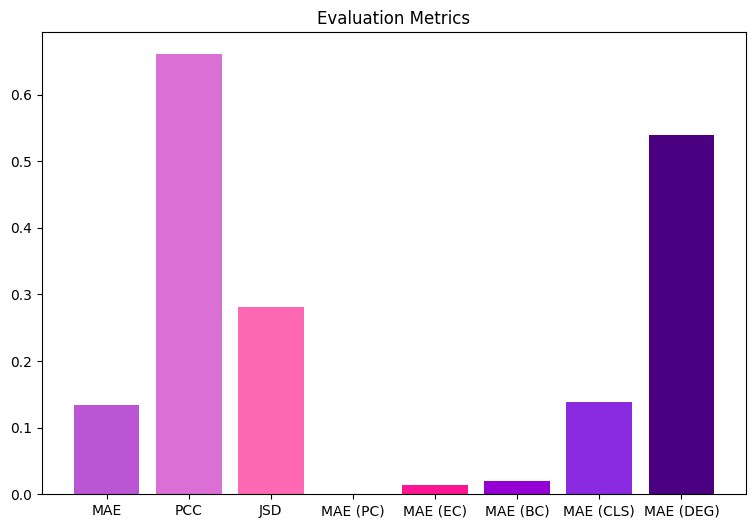

Fold 2:
MLP model total trainable parameters: 19637224


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, train_loss: 0.1212, val_loss: 0.1256
Epoch 1, train_loss: 0.1209, val_loss: 0.1244
Epoch 2, train_loss: 0.1179, val_loss: 0.1223
Epoch 3, train_loss: 0.1157, val_loss: 0.1191
Epoch 4, train_loss: 0.1128, val_loss: 0.1147
Epoch 5, train_loss: 0.1070, val_loss: 0.1093
Epoch 6, train_loss: 0.1028, val_loss: 0.1030
Epoch 7, train_loss: 0.0959, val_loss: 0.0963
Epoch 8, train_loss: 0.0901, val_loss: 0.0894
Epoch 9, train_loss: 0.0840, val_loss: 0.0826
Epoch 10, train_loss: 0.0764, val_loss: 0.0761
Epoch 11, train_loss: 0.0698, val_loss: 0.0700
Epoch 12, train_loss: 0.0638, val_loss: 0.0643
Epoch 13, train_loss: 0.0588, val_loss: 0.0593
Epoch 14, train_loss: 0.0539, val_loss: 0.0548
Epoch 15, train_loss: 0.0501, val_loss: 0.0509
Epoch 16, train_loss: 0.0459, val_loss: 0.0475
Epoch 17, train_loss: 0.0427, val_loss: 0.0447
Epoch 18, train_loss: 0.0404, val_loss: 0.0422
Epoch 19, train_loss: 0.0379, val_loss: 0.0402
Epoch 20, train_loss: 0.0362, val_loss: 0.0385
Epoch 21, train_loss: 0

Processing samples:   0%|          | 0/56 [00:00<?, ?it/s]

Overall MAE: 0.14065352082252502
Pearson Correlation Coefficient (PCC): 0.64578295
Jensen-Shannon Distance: 0.2885675058374772
Average MAE Betweenness Centrality: 0.021050200202237707
Average MAE Eigenvector Centrality: 0.014058613328792848
Average MAE PageRank Centrality: 0.0005491874492825959
Average Clustering MAE: 0.1434820292938989
Average Degree MAE: 0.5604877398720682


  0%|          | 0/112 [00:00<?, ?it/s]

torch.Size([71824])
Generated 112 predictions
Creating File at results/MLP/predictions_fold_2.csv...
Done!


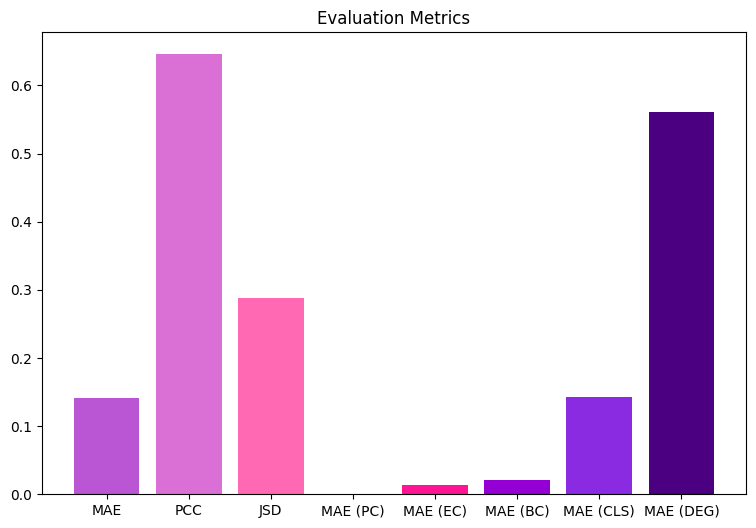

Fold 3:
MLP model total trainable parameters: 19637224


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, train_loss: 0.1249, val_loss: 0.1213
Epoch 1, train_loss: 0.1204, val_loss: 0.1199
Epoch 2, train_loss: 0.1185, val_loss: 0.1176
Epoch 3, train_loss: 0.1173, val_loss: 0.1141
Epoch 4, train_loss: 0.1133, val_loss: 0.1094
Epoch 5, train_loss: 0.1075, val_loss: 0.1036
Epoch 6, train_loss: 0.1010, val_loss: 0.0970
Epoch 7, train_loss: 0.0935, val_loss: 0.0901
Epoch 8, train_loss: 0.0877, val_loss: 0.0832
Epoch 9, train_loss: 0.0797, val_loss: 0.0765
Epoch 10, train_loss: 0.0734, val_loss: 0.0701
Epoch 11, train_loss: 0.0678, val_loss: 0.0642
Epoch 12, train_loss: 0.0617, val_loss: 0.0588
Epoch 13, train_loss: 0.0567, val_loss: 0.0540
Epoch 14, train_loss: 0.0524, val_loss: 0.0498
Epoch 15, train_loss: 0.0485, val_loss: 0.0462
Epoch 16, train_loss: 0.0445, val_loss: 0.0431
Epoch 17, train_loss: 0.0417, val_loss: 0.0404
Epoch 18, train_loss: 0.0399, val_loss: 0.0382
Epoch 19, train_loss: 0.0372, val_loss: 0.0364
Epoch 20, train_loss: 0.0355, val_loss: 0.0349
Epoch 21, train_loss: 0

Processing samples:   0%|          | 0/55 [00:00<?, ?it/s]

Overall MAE: 0.13583000004291534
Pearson Correlation Coefficient (PCC): 0.6638247
Jensen-Shannon Distance: 0.2811648584345198
Average MAE Betweenness Centrality: 0.020732739109218624
Average MAE Eigenvector Centrality: 0.013218831097467956
Average MAE PageRank Centrality: 0.000545445120198701
Average Clustering MAE: 0.13818541567309944
Average Degree MAE: 0.5420637720488467


  0%|          | 0/112 [00:00<?, ?it/s]

torch.Size([71824])
Generated 112 predictions
Creating File at results/MLP/predictions_fold_3.csv...
Done!


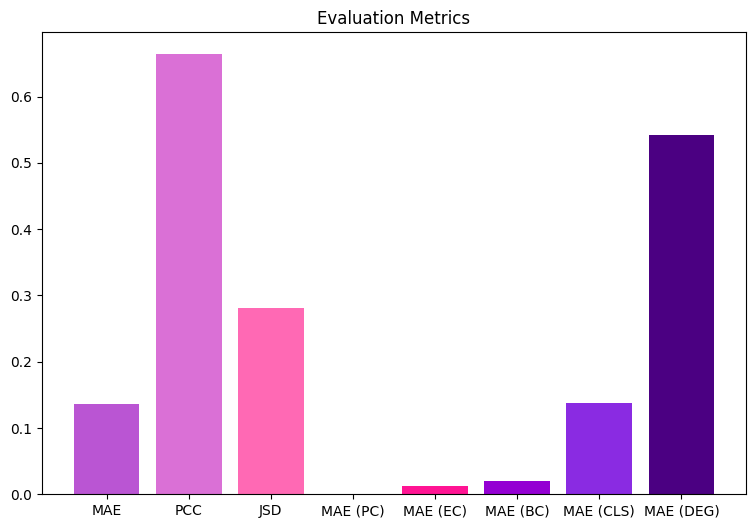

Results saved to results/MLP/metrics.csv


In [6]:
metrics_by_fold, run_history = run_kfold_MLP(MLP, args, patience, n_epoch, lr, device, dataset, test_lr_tensors, seed=random_seed, k=3, save="MLP", plot=True)

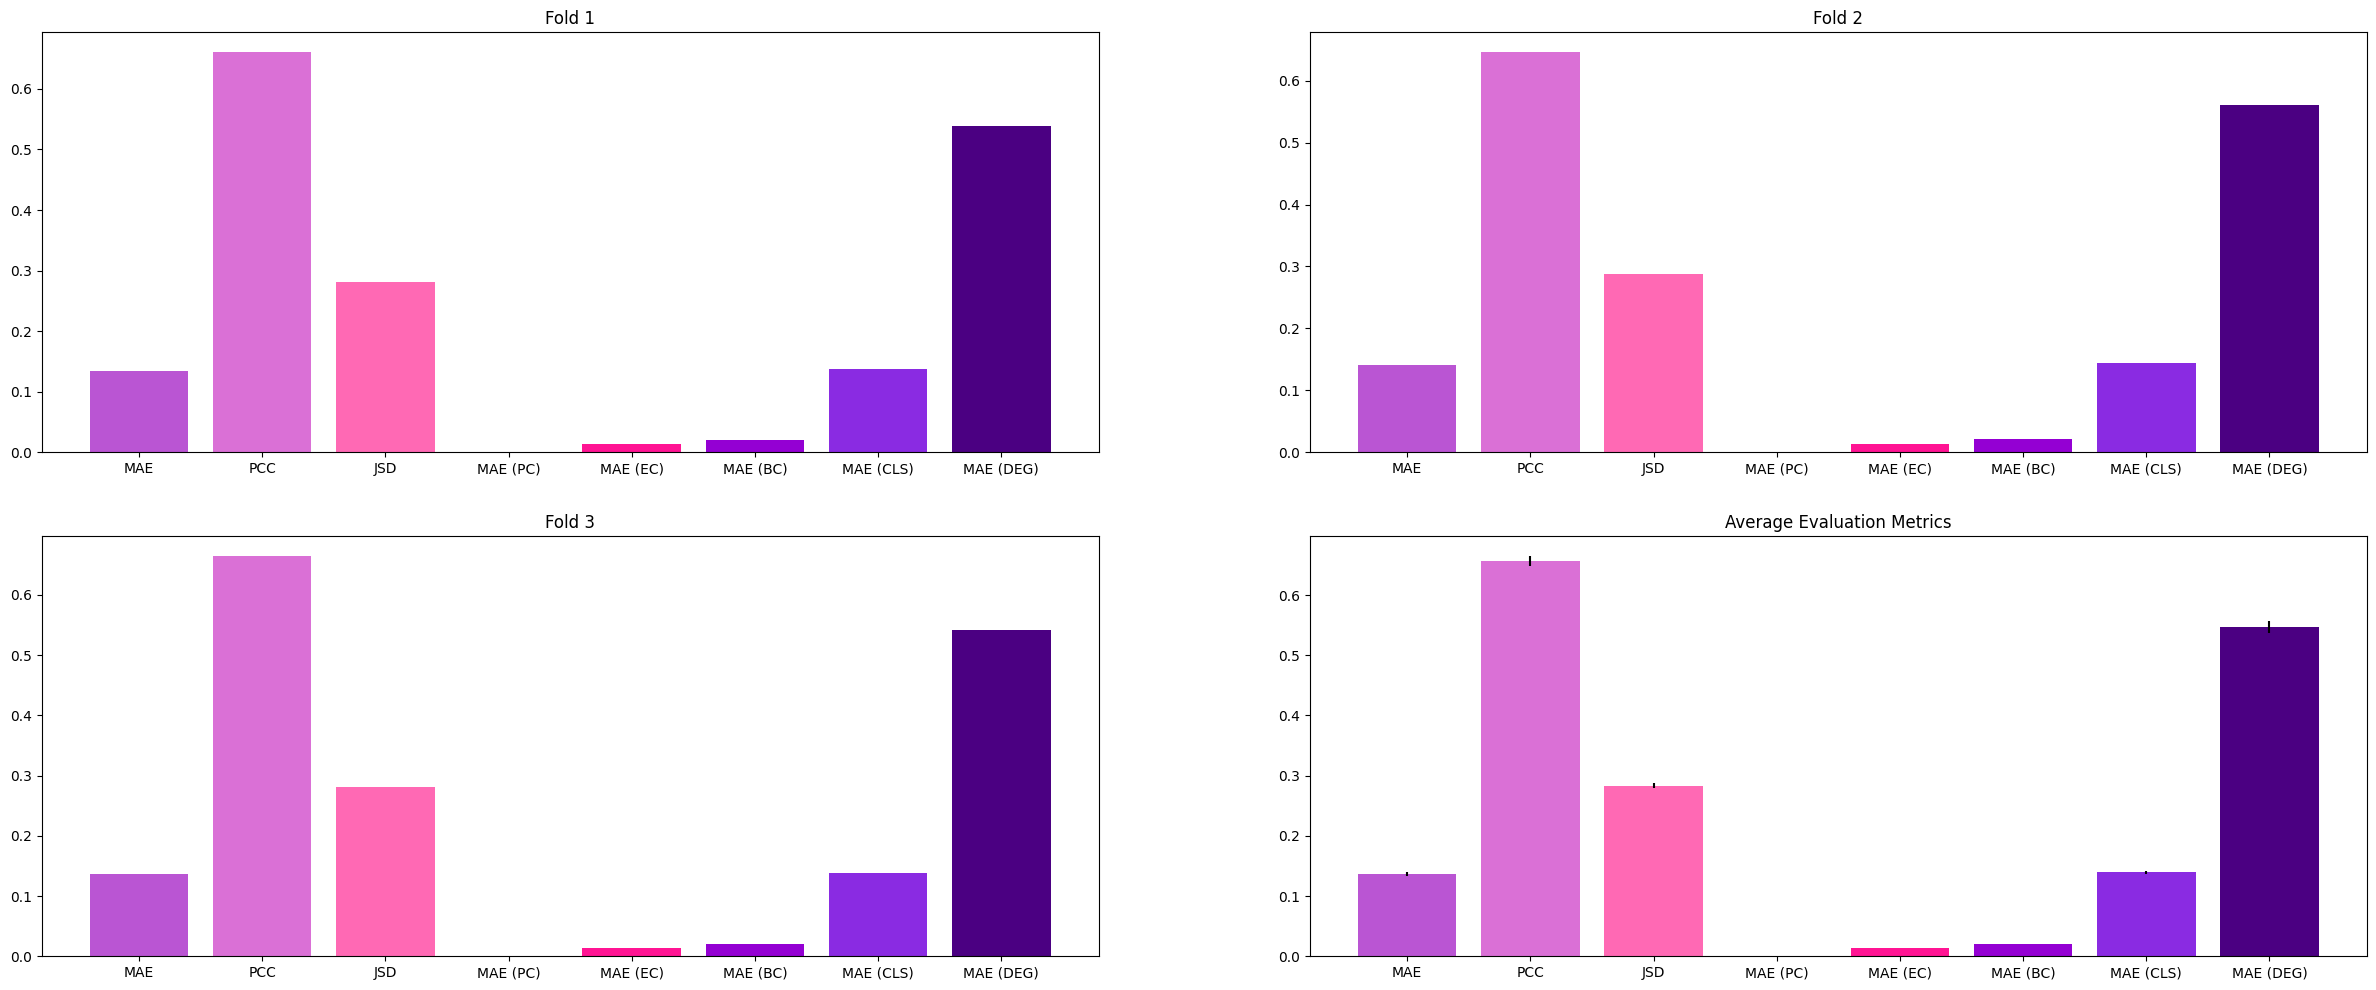

In [7]:
plot_metrics(metrics_by_fold, k=3)

In [8]:
for run_id, run_data in run_history.items():
    # Combine the training and evaluation metrics
    usage_data = run_data.get("system_usage", [])
    eval_data = run_data.get("system_usage_eval", [])
    time = run_data.get("time")
    combined_data = usage_data + eval_data

    # Calculate the maximum RAM_MB and VRAM_MB
    max_ram = max(entry["RAM_MB"] for entry in combined_data if "RAM_MB" in entry)
    max_vram = max(entry["VRAM_MB"] for entry in combined_data if "VRAM_MB" in entry)
    
    print(f"Run {run_id}: Max RAM = {max_ram} MB, Max VRAM = {max_vram} MB, Time = {time:.3f} sec")

Run 0: Max RAM = 899.5390625 MB, Max VRAM = 1956.5 MB, Time = 182.774 sec
Run 1: Max RAM = 1021.71484375 MB, Max VRAM = 1956.5 MB, Time = 208.478 sec
Run 2: Max RAM = 1025.59375 MB, Max VRAM = 1956.5 MB, Time = 198.733 sec
